In [1]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from fredapi import Fred
import credentials
#Data used from Fred dataset which can be found: https://fred.stlouisfed.org/

api_key = credentials.api_key

pd.set_option('display.max_columns', 500)
#plt.style.use('seaborn-colorblind')
plt.style.use('ggplot')

In [2]:
# Fred Initialization

fred = Fred(api_key=api_key)


In [3]:
#Fred Search

sp_search = fred.search('S&P', order_by= 'popularity')

sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-08-17   2023-08-17   
CSUSHPINSA          CSUSHPINSA     2023-08-17   2023-08-17   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-08-17   2023-08-17   
SP500                    SP500     2023-08-17   2023-08-17   
MEHOINUSA672N    MEHOINUSA672N     2023-08-17   2023-08-17   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-08-16  Daily, Close   
CSUSHPINSA            1987-01-01      2023-05-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-08-16  Daily, Close   
SP500                 2013-08-19      2023-08-16  Daily, Close   
MEHOINUSA672N         1984-01-01      2021-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-08-17 08:46:13-05:00   
CSUSHPINSA                           NSA  2023-07-25 08:11:01-05:00   
BAMLH0A0HYM2EY                       NSA  2023-08-17 08:46:17-05:00   
SP500                                NSA  2023-08-16 19:10:50-05:00   
MEHOINUSA672N                        NSA  2022-09-13 13:48:01-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           94  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             90  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  82  The observations for the S&P 500 represent the...  
MEHOINUSA672N          80  Household data are collected as of March.  As ...

<AxesSubplot:title={'center':'S&P 500'}, xlabel='Date', ylabel='Price'>

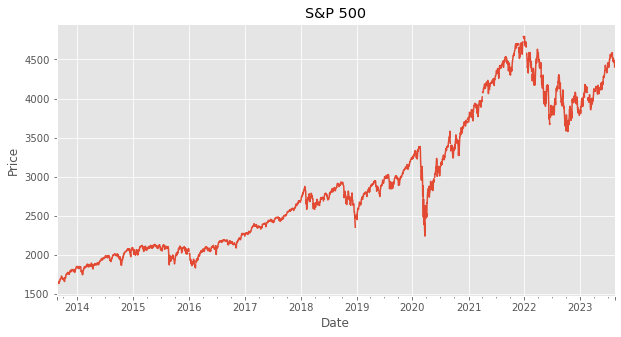

In [4]:
#Pull in some data from Fred and Plot it

sp500 = fred.get_series(series_id = 'SP500')

sp500.plot(figsize=(10,5), title='S&P 500', xlabel= 'Date', ylabel = 'Price')

In [5]:
# Pull and Join Multiple Series

unemployment_info = fred.search('unemployment')
unemployment_info.head()

id realtime_start realtime_end  \
series id                                          
UNRATE        UNRATE     2023-08-17   2023-08-17   
UNRATENSA  UNRATENSA     2023-08-17   2023-08-17   
CCSA            CCSA     2023-08-17   2023-08-17   
CCNSA          CCNSA     2023-08-17   2023-08-17   
UNEMPLOY    UNEMPLOY     2023-08-17   2023-08-17   

                                             title observation_start  \
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01   
UNRATENSA                        Unemployment Rate        1948-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   
CCNSA      Continued Claims (Insured Unemployment)        1967-01-07   
UNEMPLOY                        Unemployment Level        1948-01-01   

          observation_end                frequency frequency_short  \
series id                                                            
UNRATE         2023-07-01                  Monthly               M   
UNRATENSA      2023-07-01                  Monthly               M   
CCSA           2023-08-05  Weekly, Ending Saturday               W   
CCNSA          2023-08-05  Weekly, Ending Saturday               W   
UNEMPLOY       2023-07-01                  Monthly               M   

                          units        units_short      seasonal_adjustment  \
series id                                                                     
UNRATE                  Percent                  %      Seasonally Adjusted   
UNRATENSA               Percent                  %  Not Seasonally Adjusted   
CCSA                     Number             Number      Seasonally Adjusted   
CCNSA                    Number             Number  Not Seasonally Adjusted   
UNEMPLOY   Thousands of Persons  Thous. of Persons      Seasonally Adjusted   

          seasonal_adjustment_short               last_updated popularity  \
series id                                                                   
UNRATE                           SA  2023-08-04 07:45:03-05:00         92   
UNRATENSA                       NSA  2023-08-04 07:45:34-05:00         53   
CCSA                             SA  2023-08-17 07:33:03-05:00         73   
CCNSA                           NSA  2023-08-17 07:33:03-05:00         38   
UNEMPLOY                         SA  2023-08-04 07:45:25-05:00         65   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
CCSA       Continued claims, also referred to as insured ...  
CCNSA      Continued claims, also referred to as insured ...  
UNEMPLOY   The series comes from the 'Current Population ...

In [6]:
unemployment_rate_adjusted = fred.get_series('UNRATE')
unemployment_rate_adjusted

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
Length: 907, dtype: float64

<AxesSubplot:title={'center':'Unemployment Rate in USA'}, xlabel='Year', ylabel='Unemplyoment Percentage'>

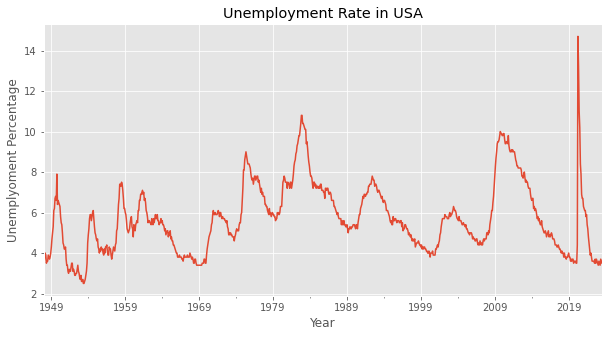

In [46]:
unemployment_rate_adjusted.plot(figsize=(10,5), title = 'Unemployment Rate in USA', xlabel = 'Year', ylabel = 'Unemplyoment Percentage')

In [8]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemployment_df.head()

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2023-08-17   2023-08-17   
UNRATENSA      UNRATENSA     2023-08-17   2023-08-17   
LNS14000006  LNS14000006     2023-08-17   2023-08-17   
UNEMPLOY        UNEMPLOY     2023-08-17   2023-08-17   
LNU04000006  LNU04000006     2023-08-17   2023-08-17   

                                                     title observation_start  \
series id                                                                      
UNRATE                                   Unemployment Rate        1948-01-01   
UNRATENSA                                Unemployment Rate        1948-01-01   
LNS14000006  Unemployment Rate - Black or African American        1972-01-01   
UNEMPLOY                                Unemployment Level        1948-01-01   
LNU04000006  Unemployment Rate - Black or African American        1972-01-01   

            observation_end frequency frequency_short                 units  \
series id                                                                     
UNRATE           2023-07-01   Monthly               M               Percent   
UNRATENSA        2023-07-01   Monthly               M               Percent   
LNS14000006      2023-07-01   Monthly               M               Percent   
UNEMPLOY         2023-07-01   Monthly               M  Thousands of Persons   
LNU04000006      2023-07-01   Monthly               M               Percent   

                   units_short      seasonal_adjustment  \
series id                                                 
UNRATE                       %      Seasonally Adjusted   
UNRATENSA                    %  Not Seasonally Adjusted   
LNS14000006                  %      Seasonally Adjusted   
UNEMPLOY     Thous. of Persons      Seasonally Adjusted   
LNU04000006                  %  Not Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2023-08-04 07:45:03-05:00         92   
UNRATENSA                         NSA  2023-08-04 07:45:34-05:00         53   
LNS14000006                        SA  2023-08-04 07:45:23-05:00         67   
UNEMPLOY                           SA  2023-08-04 07:45:25-05:00         65   
LNU04000006                       NSA  2023-08-04 07:46:00-05:00         16   

                                                         notes  
series id                                                       
UNRATE       The unemployment rate represents the number of...  
UNRATENSA    The unemployment rate represents the number of...  
LNS14000006  The series comes from the 'Current Population ...  
UNEMPLOY     The series comes from the 'Current Population ...  
LNU04000006  The series comes from the 'Current Population ...

In [9]:
filtered_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
filtered_df.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-08-17   2023-08-17   
LNS14000006            LNS14000006     2023-08-17   2023-08-17   
U6RATE                      U6RATE     2023-08-17   2023-08-17   
CAUR                          CAUR     2023-08-17   2023-08-17   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-08-17   2023-08-17   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
U6RATE            Total Unemployed, Plus All Persons Marginally ...   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-07-01   Monthly               M   
LNS14000006             1972-01-01      2023-07-01   Monthly               M   
U6RATE                  1994-01-01      2023-07-01   Monthly               M   
CAUR                    1976-01-01      2023-06-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
U6RATE            Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-08-04 07:45:03-05:00   
LNS14000006                             SA  2023-08-04 07:45:23-05:00   
U6RATE                                  SA  2023-08-04 07:45:30-05:00   
CAUR                                    SA  2023-07-26 14:43:01-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   92  The unemployment rate represents the number of...  
LNS14000006              67  The series comes from the 'Current Population ...  
U6RATE                   63  The series comes from the 'Current Population ...  
CAUR                     57                                               None  
M0892AUSM156SNBR         48  Series Is Presented Here As Three Variables--(...

In [10]:
#Filter out all results not including Unemployment rate
unemployment_rate_by_location = filtered_df.loc[filtered_df['title'].str.contains('Unemployment Rate')]
# Fred denotes states rates by their state Abbreviation + 'UR', this picks out only the values in that format
unemployment_rate_by_location = unemployment_rate_by_location.loc[unemployment_rate_by_location['id'].str.len()==4]

In [11]:
unemployment_rate_by_location.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'MIUR', 'OHUR', 'NCUR', 'PAUR', 'MAUR',
       'ALUR', 'TNUR', 'MNUR', 'COUR', 'NJUR', 'ILUR', 'WIUR', 'SCUR', 'GAUR',
       'ORUR', 'AZUR', 'VAUR', 'MOUR', 'WAUR', 'UTUR', 'KYUR', 'MDUR', 'INUR',
       'OKUR', 'ARUR', 'LAUR', 'KSUR', 'NEUR', 'AKUR', 'IAUR', 'NVUR', 'WVUR',
       'DCUR', 'NMUR', 'PRUR', 'CTUR', 'MTUR', 'HIUR', 'SDUR', 'NDUR', 'MSUR',
       'DEUR', 'VTUR', 'RIUR', 'IDUR', 'MEUR', 'WYUR', 'NHUR'],
      dtype='object', name='series id')

In [12]:
state_results = []

for fred_id in unemployment_rate_by_location.index:
    result = fred.get_series(fred_id)
    result = result.to_frame(name = fred_id)
    state_results.append(result)

In [13]:
#Change from a list of unemplyment dataframes to a dataframe of the values where x= state, y = dates
unemployment_rates_monthly = pd.concat(state_results, axis=1)
unemployment_rates_monthly.head()

CAUR  TXUR  FLUR  NYUR  MIUR  OHUR  NCUR  PAUR  MAUR  ALUR  TNUR  \
1976-01-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.0  10.5   6.6   6.0   
1976-02-01   9.2   5.8   9.7  10.3   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-03-01   9.1   5.9   9.6  10.2   9.9   8.1   6.4   8.1  10.5   6.6   6.0   
1976-04-01   9.1   5.9   9.5  10.2   9.8   8.0   6.3   8.1  10.3   6.5   6.0   
1976-05-01   9.0   5.9   9.3  10.1   9.6   7.8   6.1   8.1  10.1   6.4   5.9   

            MNUR  COUR  NJUR  ILUR  WIUR  SCUR  GAUR  ORUR  AZUR  VAUR  MOUR  \
1976-01-01   6.0   5.8  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-02-01   6.0   5.7  10.3   6.6   5.8   7.4   8.4   9.5  10.2   6.1   5.9   
1976-03-01   5.9   5.7  10.3   6.6   5.7   7.3   8.4   9.4  10.1   6.1   5.9   
1976-04-01   5.8   5.6  10.3   6.6   5.6   7.2   8.3   9.2  10.0   6.0   6.0   
1976-05-01   5.7   5.6  10.3   6.6   5.5   7.0   8.1   9.1   9.8   5.9   6.0   

            WAUR  UTUR  KYUR  MDUR  INUR  OKUR  ARUR  LAUR  KSUR  NEUR  AKUR  \
1976-01-01   8.5   5.8   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-02-01   8.5   5.9   5.6   6.4   6.6   5.8   7.3   6.3   4.2   3.3   7.1   
1976-03-01   8.4   5.8   5.6   6.4   6.5   5.8   7.3   6.3   4.2   3.3   7.0   
1976-04-01   8.5   5.8   5.6   6.4   6.3   5.8   7.2   6.4   4.2   3.2   6.9   
1976-05-01   8.5   5.7   5.5   6.5   6.0   5.7   7.1   6.5   4.2   3.1   6.9   

            IAUR  NVUR  WVUR  DCUR  NMUR  PRUR  CTUR  MTUR  HIUR  SDUR  NDUR  \
1976-01-01   4.3   9.2   7.5   8.7   8.6  19.6   9.8   5.8   9.8   3.3   3.4   
1976-02-01   4.3   9.2   7.5   8.7   8.7  19.5   9.8   5.8   9.8   3.3   3.4   
1976-03-01   4.3   9.2   7.5   8.6   8.7  19.3   9.8   5.8   9.8   3.2   3.4   
1976-04-01   4.2   9.0   7.5   8.5   8.6  19.0   9.6   5.8   9.7   3.1   3.5   
1976-05-01   4.1   8.9   7.4   8.4   8.6  18.9   9.4   5.8   9.4   3.1   3.6   

            MSUR  DEUR  VTUR  RIUR  IDUR  MEUR  WYUR  NHUR  
1976-01-01   6.7   8.0   8.6   7.8   5.6   8.7   4.1   6.5  
1976-02-01   6.7   8.0   8.6   7.8   5.6   8.7   4.1   6.5  
1976-03-01   6.6   8.0   8.6   7.7   5.6   8.6   4.1   6.5  
1976-04-01   6.4   8.1   8.6   7.7   5.6   8.6   4.0   6.5  
1976-05-01   6.3   8.3   8.5   7.7   5.6   8.5   3.9   6.5

<AxesSubplot:>

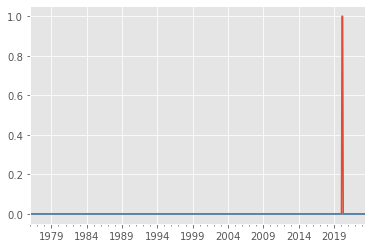

In [14]:
#Ensure we aren't missing any dates
unemployment_rates_monthly.isna().sum(axis=1).plot()

unemployment_rates_monthly_fixed = unemployment_rates_monthly.dropna()
unemployment_rates_monthly_fixed.isna().sum(axis=1).plot()
#

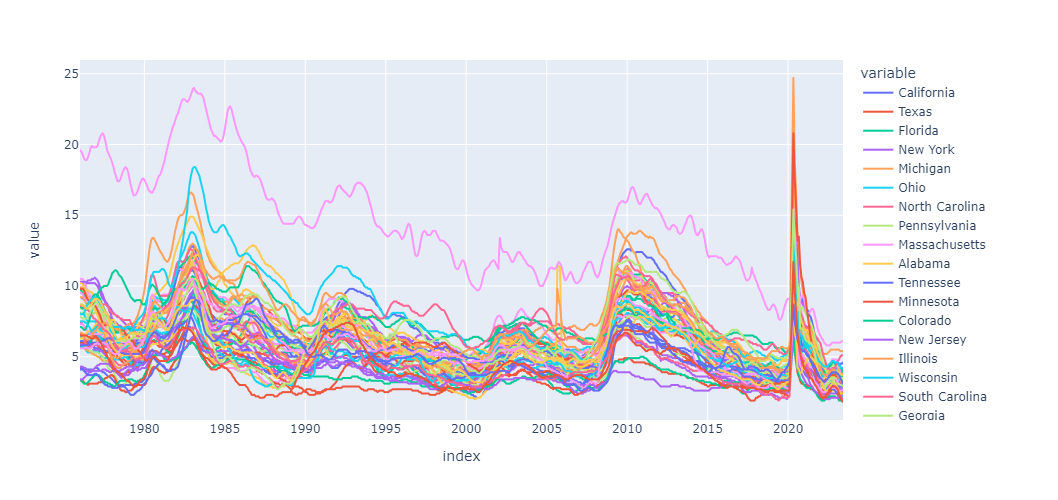

In [15]:
#Plot state's unemployment rates

#Switch ID's to State's names using the Title values from the Fred Database
id_to_state = filtered_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemployment_rates_monthly_fixed.columns = [id_to_state[i] for i in unemployment_rates_monthly_fixed.columns]

px.line(data_frame = unemployment_rates_monthly_fixed).update_layout(width=1000, height = 500)

<AxesSubplot:title={'center':'Unemployment Rates by State in May 2020'}>

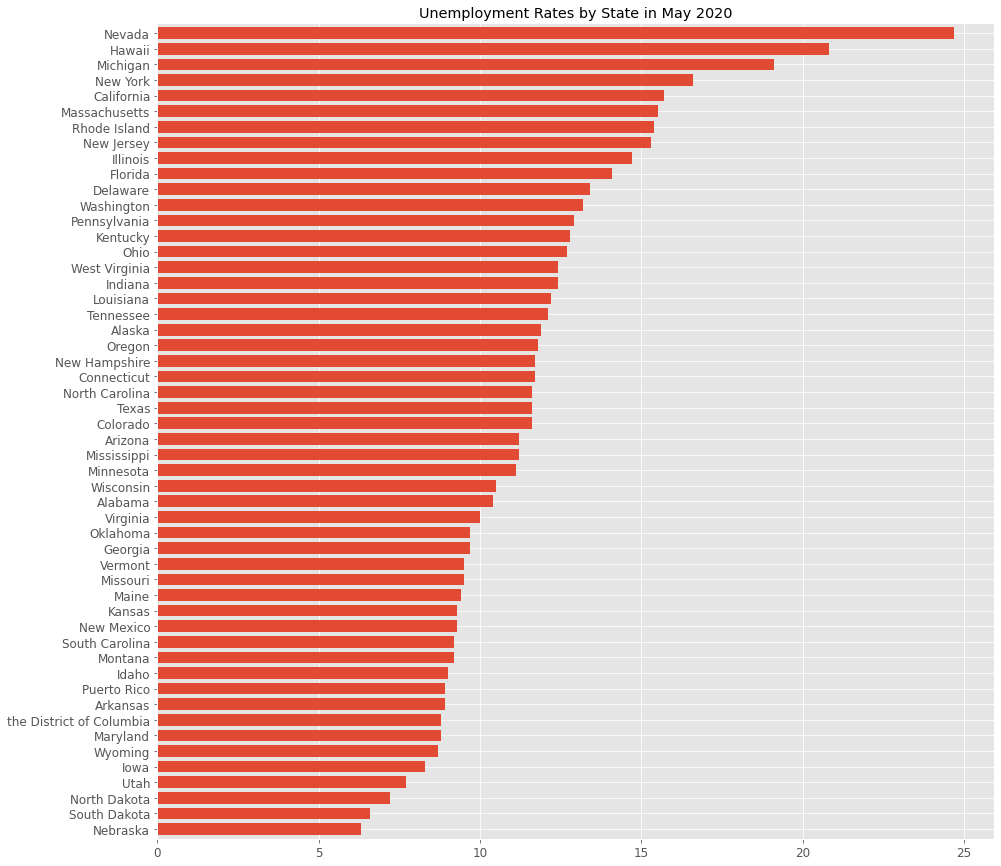

In [16]:
#Pull May 2020 Uneployment Rate per State

may_2020_ur = unemployment_rates_monthly_fixed.loc[unemployment_rates_monthly_fixed.index == '2020-05-01']
#may_2020_ur['id'].str.strip('UR')
may_2020_ur=may_2020_ur.T
may_2020_ur= may_2020_ur.sort_values('2020-05-01')

may_2020_ur.plot(kind = 'barh', 
                 figsize = (15,15), 
                 title = 'Unemployment Rates by State in May 2020', 
                 legend=False, 
                 width = 0.75, 
                 fontsize = 12)

In [17]:
#Pull the Participation Rate

participation_df = fred.search('participation rate state', filter=('frequency','Monthly'))
filtered_p_df = participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


#Get all of the state specific articipation rates
filtered_p_df = filtered_p_df.loc[filtered_p_df['title'].str.contains('Labor Force Participation Rate for')]
filtered_p_df.shape

id_p_to_state = filtered_p_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()


In [18]:
participation_state_results = []

for fred_id in filtered_p_df.index:
    result = fred.get_series(fred_id)
    result = result.to_frame(name = fred_id)
    participation_state_results.append(result)

participation_rates_monthly = pd.concat(participation_state_results, axis=1)
participation_rates_monthly.head()

LBSSA01  LBSSA06  LBSSA12  LBSSA21  LBSSA27  LBSSA26  LBSSA19  \
1976-01-01     57.0     62.6     55.8     60.5     65.6     61.6     64.4   
1976-02-01     56.9     62.4     55.7     60.3     65.5     61.5     64.3   
1976-03-01     56.8     62.2     55.5     60.2     65.4     61.5     64.2   
1976-04-01     56.8     62.2     55.5     60.1     65.4     61.6     64.1   
1976-05-01     56.8     62.3     55.4     60.1     65.5     61.7     64.1   

            LBSSA39  LBSSA55  LBSSA35  LBSSA48  LBSSA51  LBSSA42  LBSSA37  \
1976-01-01     61.7     65.6     60.8     63.8     65.9     58.4     66.5   
1976-02-01     61.7     65.5     60.5     63.5     65.8     58.3     66.3   
1976-03-01     61.7     65.4     60.3     63.4     65.6     58.3     66.2   
1976-04-01     61.6     65.4     60.3     63.5     65.5     58.3     66.2   
1976-05-01     61.6     65.5     60.3     63.6     65.4     58.3     66.3   

            LBSSA54  LBSSA25  LBSSA24  LBSSA13  LBSSA47  LBSSA17  LBSSA22  \
1976-01-01     52.5     64.8     64.3     63.7     59.6     63.0     56.8   
1976-02-01     52.4     64.7     64.2     63.6     59.4     63.0     56.6   
1976-03-01     52.3     64.6     64.1     63.5     59.3     62.9     56.5   
1976-04-01     52.3     64.6     64.1     63.5     59.3     62.9     56.4   
1976-05-01     52.2     64.6     64.1     63.6     59.4     63.0     56.4   

            LBSSA18  LBSSA08  LBSSA23  LBSSA04  LBSSA36  LBSSA29  LBSSA34  \
1976-01-01     64.0     67.2     62.1     59.5     58.0     60.5     61.5   
1976-02-01     63.9     67.0     61.9     59.2     58.0     60.3     61.4   
1976-03-01     63.8     66.8     61.9     59.1     58.0     60.3     61.4   
1976-04-01     63.8     66.6     61.8     59.1     58.0     60.4     61.5   
1976-05-01     63.9     66.5     61.7     59.1     58.1     60.6     61.6   

            LBSSA45  LBSSA09  LBSSA28  LBSSA53  LBSSA49  LBSSA31  LBSSA05  \
1976-01-01     65.3     64.2     58.8     60.9     62.8     64.9     57.9   
1976-02-01     65.2     64.1     58.6     60.7     62.6     64.9     57.8   
1976-03-01     65.0     64.0     58.5     60.6     62.5     64.8     57.7   
1976-04-01     64.9     64.1     58.5     60.6     62.5     64.8     57.7   
1976-05-01     64.7     64.3     58.5     60.7     62.6     64.8     57.7   

            LBSSA41  LBSSA02  LBSSA16  LBSSA50  LBSSA32  LBSSA30  LBSSA46  \
1976-01-01     62.9     69.0     63.0     63.6     71.3     62.7     64.6   
1976-02-01     62.7     68.4     62.8     63.4     70.8     62.5     64.4   
1976-03-01     62.5     67.8     62.7     63.2     70.5     62.4     64.4   
1976-04-01     62.4     67.9     62.7     63.5     70.4     62.3     64.3   
1976-05-01     62.5     67.9     62.8     63.6     70.5     62.2     64.3   

            LBSSA40  LBSSA33  LBSSA20  LBSSA38  LBSSA56  LBSSA10  LBSSA15  \
1976-01-01     59.3     65.9     65.1     62.6     65.3     62.7     69.9   
1976-02-01     59.2     65.6     65.0     62.4     64.9     62.5     69.6   
1976-03-01     59.1     65.6     64.9     62.3     64.7     62.5     69.6   
1976-04-01     59.0     65.7     65.0     62.5     64.9     62.4     69.4   
1976-05-01     59.0     66.0     65.1     62.6     65.2     62.4     69.3   

            LBSSA44  LBSSA11  
1976-01-01     63.8     64.4  
1976-02-01     63.7     64.5  
1976-03-01     63.6     64.5  
1976-04-01     63.7     64.5  
1976-05-01     63.6     64.4

In [19]:
participation_rates_monthly.columns = [id_p_to_state[i] for i in participation_rates_monthly.columns]

In [20]:
participation_rates_monthly_fixed = participation_rates_monthly.dropna()

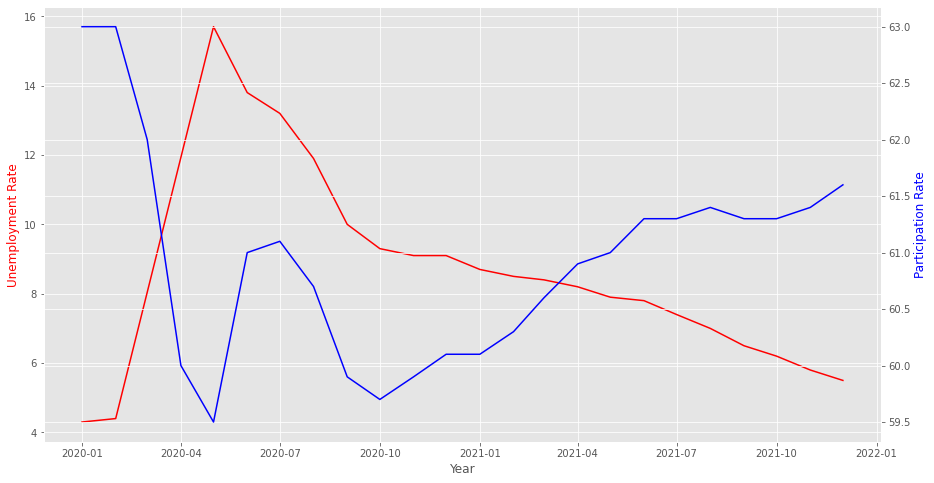

In [21]:
#Plot Unemployment vs Participation
fig, ax1 = plt.subplots(figsize = (15,8))
ax2 = ax1.twinx()
unemp_data = unemployment_rates_monthly_fixed.query('index>=2020 & index <2022')['California']
#.plot(ax=ax1, label = 'Unemployment Rate', color = 'red')
part_data = participation_rates_monthly_fixed.query('index>=2020 & index <2022')['California']
#.plot(ax=ax2, label = 'Participation Rate', color = 'blue')

ax1.set_xlabel('Year')

ax1.plot(unemp_data, label = 'Unemployment Rate', color = 'red')
ax1.set_ylabel('Unemployment Rate', color = 'red')
ax2.plot(part_data, label = 'Participation Rate', color = 'blue')
ax2.set_ylabel('Participation Rate', color = 'blue')
plt.show()

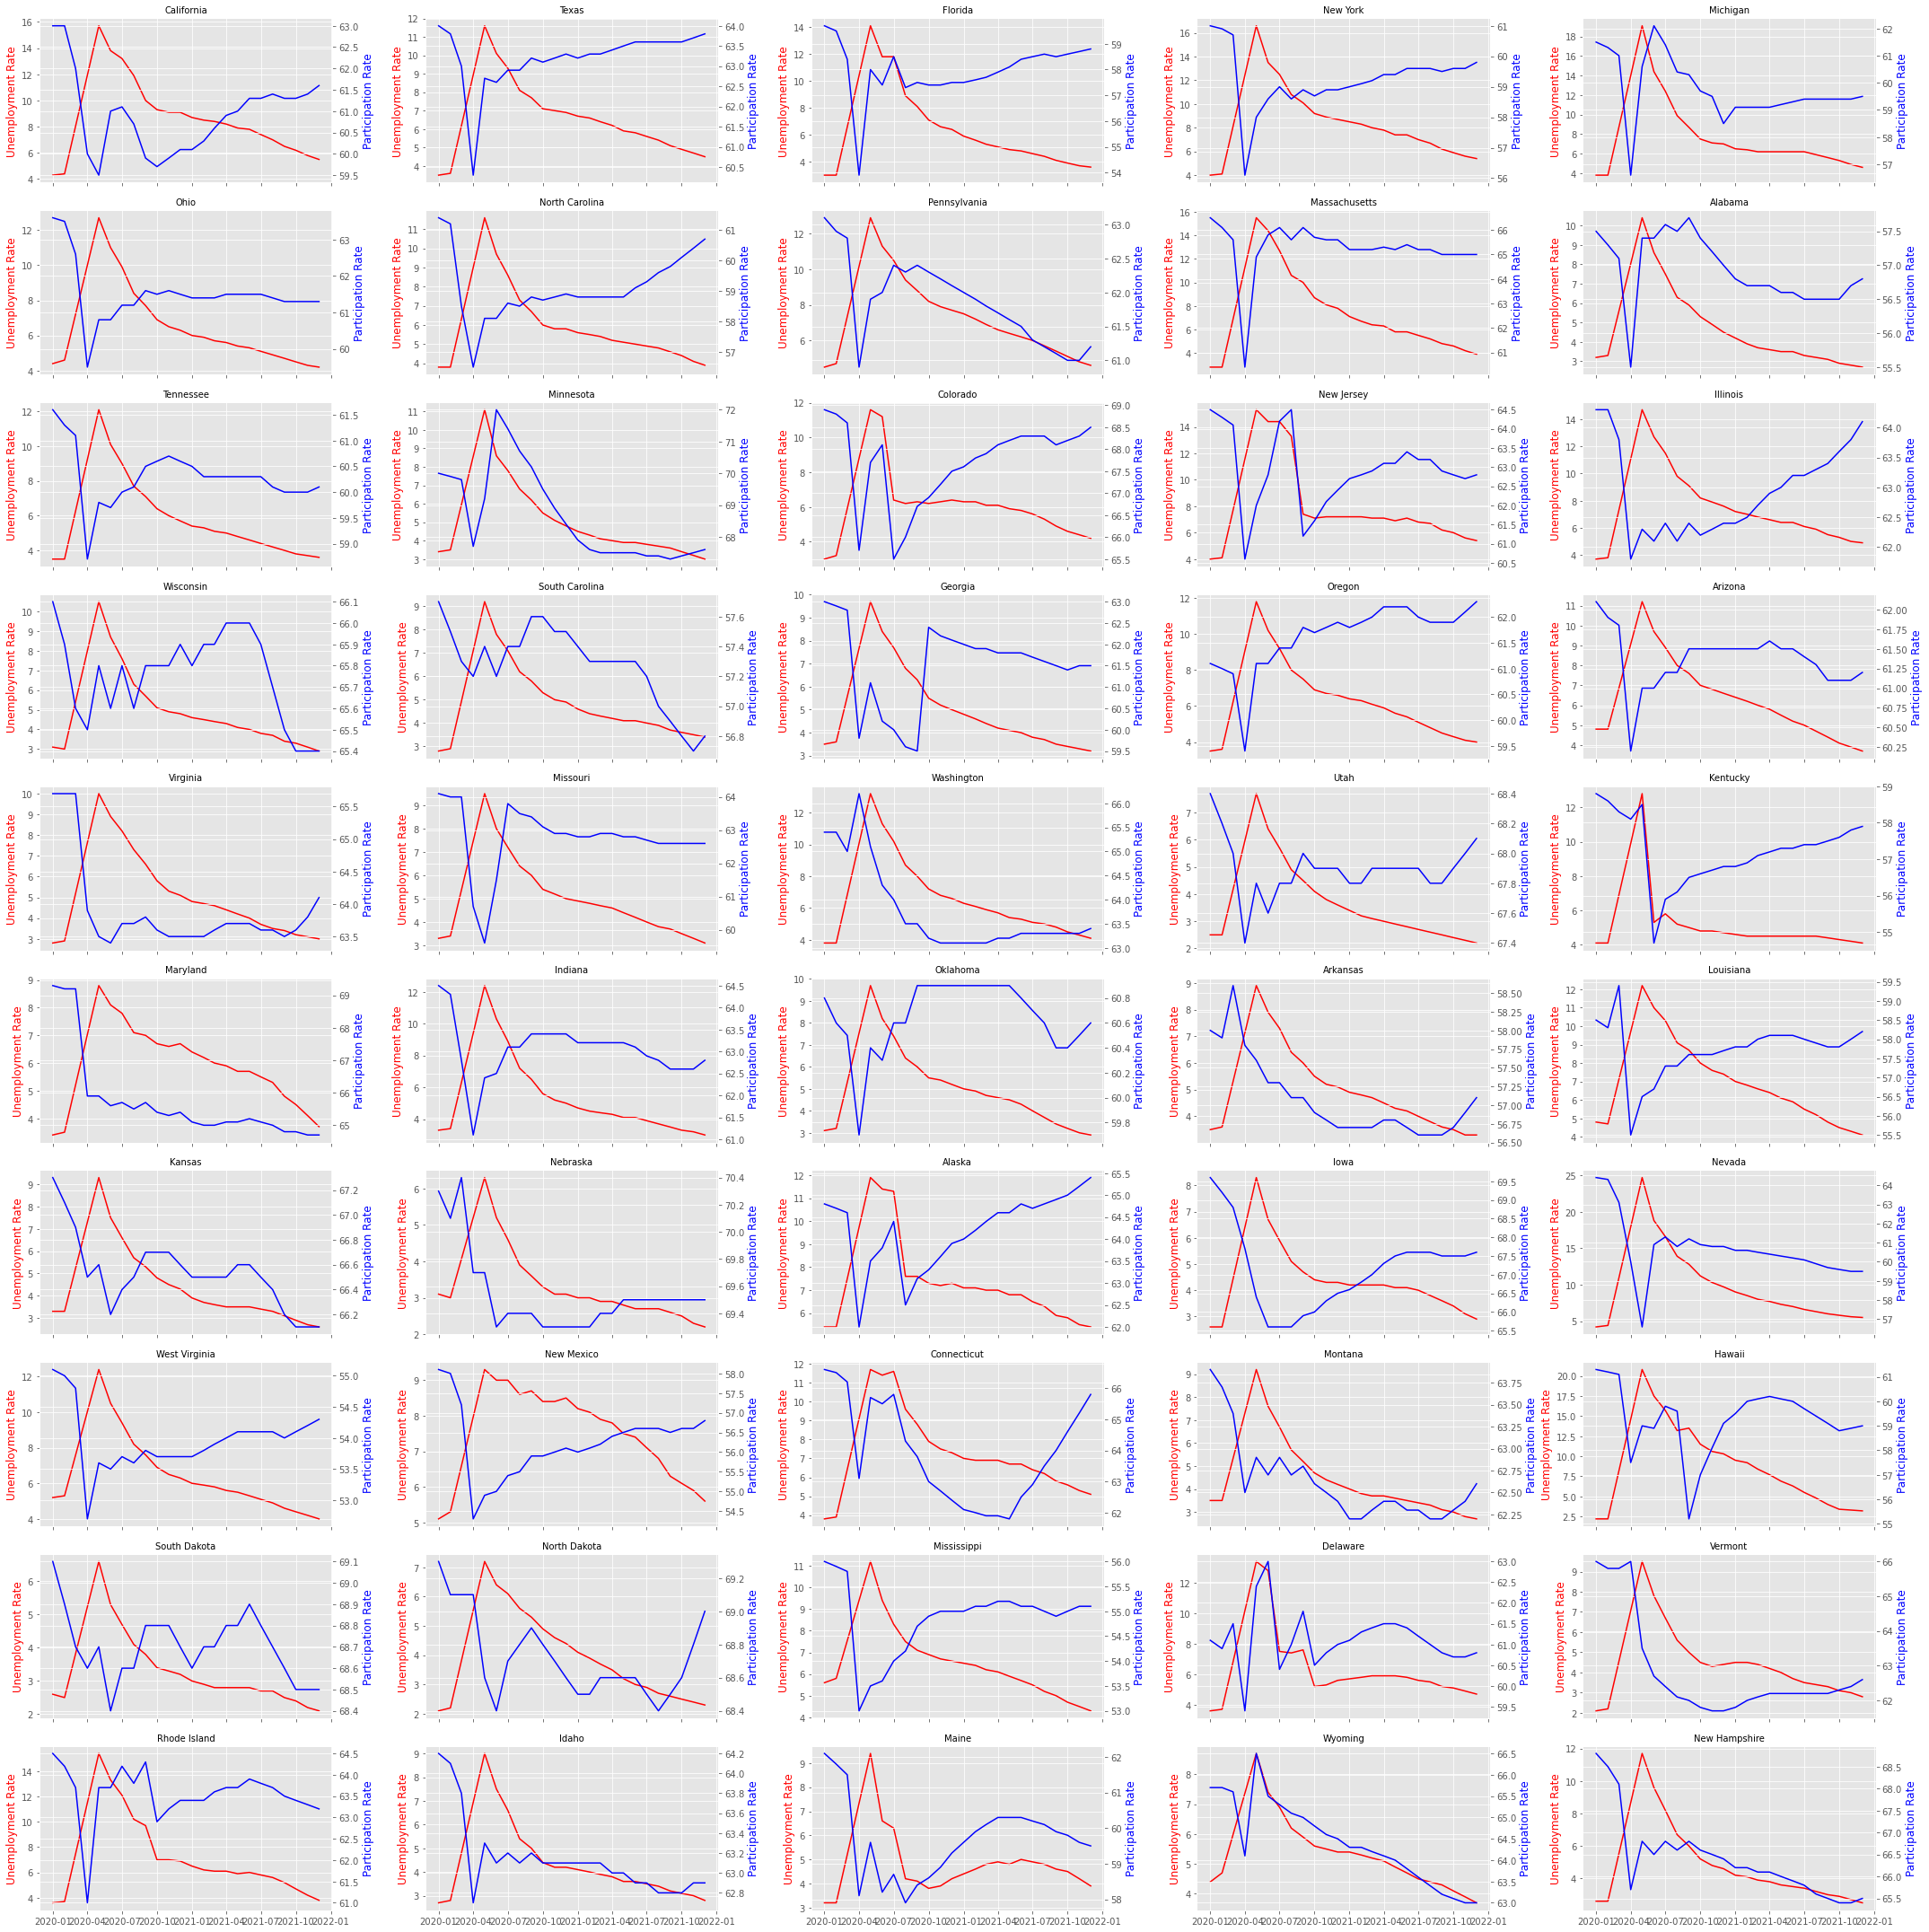

In [40]:
#Plot Unemployment vs Participation

fig, axs = plt.subplots(10, 5, figsize = (30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_rates_monthly_fixed.columns:
    #We dont have participation rate of Puerto Rico as available data
    #We are only looking at the 50 US states, not the DC district
    if state == 'the District of Columbia' or state == 'Puerto Rico':
        continue
    ax2 = axs[i].twinx()
    unemp_data = unemployment_rates_monthly_fixed.query('index>=2020 & index <2022')[state]
    #.plot(ax=ax1, label = 'Unemployment Rate', color = 'red')
    part_data = participation_rates_monthly_fixed.query('index>=2020 & index <2022')[state]
    #.plot(ax=ax2, label = 'Participation Rate', color = 'blue')

    ax1.set_xlabel('Year')

    axs[i].plot(unemp_data, label = 'Unemployment Rate', color = 'red')
    axs[i].set_ylabel('Unemployment Rate', color = 'red')
    ax2.plot(part_data, label = 'Participation Rate', color = 'blue')
    ax2.set_ylabel('Participation Rate', color = 'blue')
    ax2.set_title(state, fontsize = 10)
    i=i+1
plt.tight_layout()
plt.show()


series id
LBSSA01           Labor Force Participation Rate for Alabama
LBSSA06        Labor Force Participation Rate for California
LBSSA12           Labor Force Participation Rate for Florida
LBSSA21          Labor Force Participation Rate for Kentucky
LBSSA27         Labor Force Participation Rate for Minnesota
LBSSA26          Labor Force Participation Rate for Michigan
LBSSA19              Labor Force Participation Rate for Iowa
LBSSA39              Labor Force Participation Rate for Ohio
LBSSA55         Labor Force Participation Rate for Wisconsin
LBSSA35        Labor Force Participation Rate for New Mexico
LBSSA48             Labor Force Participation Rate for Texas
LBSSA51          Labor Force Participation Rate for Virginia
LBSSA42      Labor Force Participation Rate for Pennsylvania
LBSSA37    Labor Force Participation Rate for North Carolina
LBSSA54     Labor Force Participation Rate for West Virginia
LBSSA25     Labor Force Participation Rate for Massachusetts
LBSSA24       

51